In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import helpers as helper

In [2]:
db_path = '/auto/users/hellerc/code/nems_db/'

In [6]:
batch = 309
cutoff = .5  # octaves from target freq to be considered ON BF
r0_threshold = 0  # min value of st.pup0.afl0 r_test in order to be considered a sig. sensory response
st_sig = 'st.pup.afl'
p0 = 'st.pup0.afl'
b0 = 'st.pup.afl0'
st_sig0 = 'st.pup0.afl0'

In [7]:
df = helper.preprocess_sdexp_dump('d_{}_sdexp_pup_afl.csv'.format(batch),
                                 full_model=st_sig, p0=p0, b0=b0, shuf_model=st_sig0,
                                 r0_threshold=0, octave_cutoff=cutoff, path=db_path)

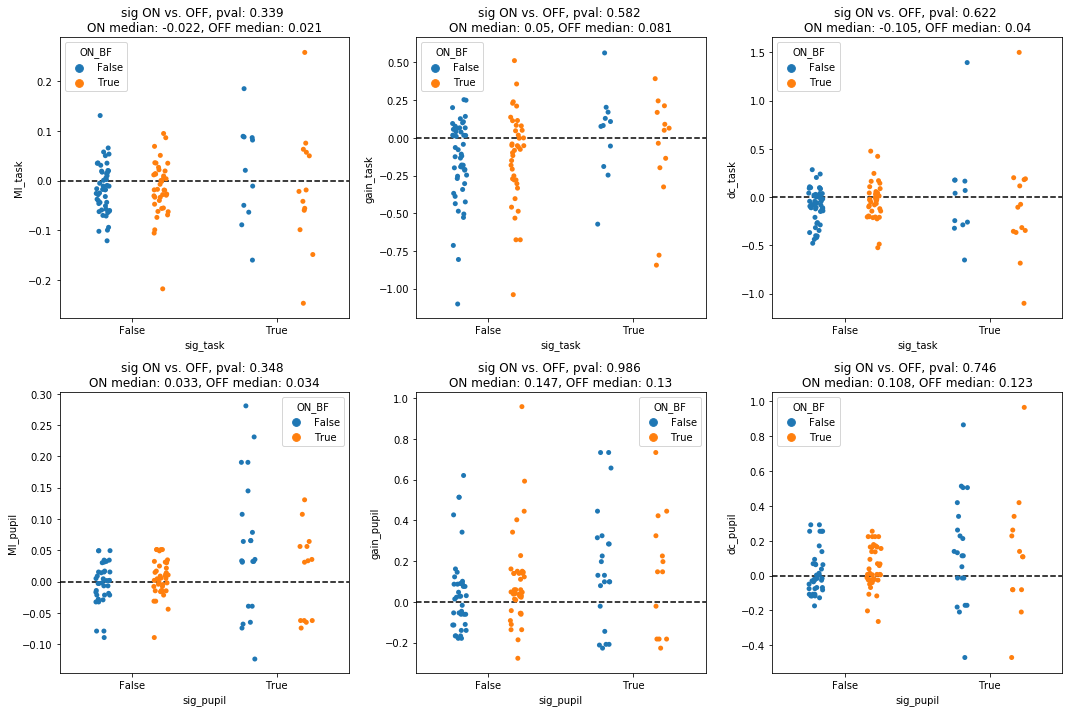

In [10]:
fix_ylims = False
data = df[df.sig_psth]

f, ax = plt.subplots(2, 3, figsize=(15, 10))

# BEHAVIOR results
# MI
sns.stripplot(x='sig_task', y='MI_task', hue='ON_BF', data=data, dodge=True, ax=ax[0, 0])
ax[0, 0].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_task'] & data['ON_BF']]['MI_task'], data[data['sig_task'] & data['OFF_BF']]['MI_task']).pvalue, 3)
on_median = np.round(data[data['sig_task'] & data['ON_BF']]['MI_task'].median(), 3)
off_median = np.round(data[data['sig_task'] & data['OFF_BF']]['MI_task'].median(), 3)
ax[0, 0].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

# Gain
sns.stripplot(x='sig_task', y='gain_task', hue='ON_BF', data=data, dodge=True, ax=ax[0, 1])
ax[0, 1].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_task'] & data['ON_BF']]['gain_task'], data[data['sig_task'] & data['OFF_BF']]['gain_task']).pvalue, 3)
on_median = np.round(data[data['sig_task'] & data['ON_BF']]['gain_task'].median(), 3)
off_median = np.round(data[data['sig_task'] & data['OFF_BF']]['gain_task'].median(), 3)
ax[0, 1].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

# DC
sns.stripplot(x='sig_task', y='dc_task', hue='ON_BF', data=data, dodge=True, ax=ax[0, 2])
ax[0, 2].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_task'] & data['ON_BF']]['dc_task'], data[data['sig_task'] & data['OFF_BF']]['dc_task']).pvalue, 3)
on_median = np.round(data[data['sig_task'] & data['ON_BF']]['dc_task'].median(), 3)
off_median = np.round(data[data['sig_task'] & data['OFF_BF']]['dc_task'].median(), 3)
ax[0, 2].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

# PUPIL results
# MI
sns.stripplot(x='sig_pupil', y='MI_pupil', hue='ON_BF', data=data, dodge=True, ax=ax[1, 0])
ax[1, 0].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_pupil'] & data['ON_BF']]['MI_pupil'], data[data['sig_pupil'] & data['OFF_BF']]['MI_pupil']).pvalue, 3)
on_median = np.round(data[data['sig_pupil'] & data['ON_BF']]['MI_pupil'].median(), 3)
off_median = np.round(data[data['sig_pupil'] & data['OFF_BF']]['MI_pupil'].median(), 3)
ax[1, 0].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

# Gain
sns.stripplot(x='sig_pupil', y='gain_pupil', hue='ON_BF', data=data, dodge=True, ax=ax[1, 1])
ax[1, 1].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_pupil'] & data['ON_BF']]['gain_pupil'], data[data['sig_pupil'] & data['OFF_BF']]['gain_pupil']).pvalue, 3)
on_median = np.round(data[data['sig_pupil'] & data['ON_BF']]['gain_pupil'].median(), 3)
off_median = np.round(data[data['sig_pupil'] & data['OFF_BF']]['gain_pupil'].median(), 3)
ax[1, 1].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

# DC
sns.stripplot(x='sig_pupil', y='dc_pupil', hue='ON_BF', data=data, dodge=True, ax=ax[1, 2])
ax[1, 2].axhline(0, linestyle='--', color='k')
pval = np.round(ss.ranksums(data[data['sig_pupil'] & data['ON_BF']]['dc_pupil'], data[data['sig_pupil'] & data['OFF_BF']]['dc_pupil']).pvalue, 3)
on_median = np.round(data[data['sig_pupil'] & data['ON_BF']]['dc_pupil'].median(), 3)
off_median = np.round(data[data['sig_pupil'] & data['OFF_BF']]['dc_pupil'].median(), 3)
ax[1, 2].set_title('sig ON vs. OFF, pval: {0} \n'
                    'ON median: {1}, OFF median: {2}'.format(pval, on_median, off_median))

if fix_ylims:
    for a in ax.flatten():
        a.set_ylim((-1.5, 1.5))
        
f.tight_layout()

In [11]:
on_cells = data[data['ON_BF']].index.unique()
off_cells = data[data['OFF_BF']].index.unique()
matched = np.unique([c for c in data.index.unique() if (c in on_cells.values) & (c in off_cells.values)])
print('{0} cellids found for both condtions'.format(len(matched)))

19 cellids found for both condtions


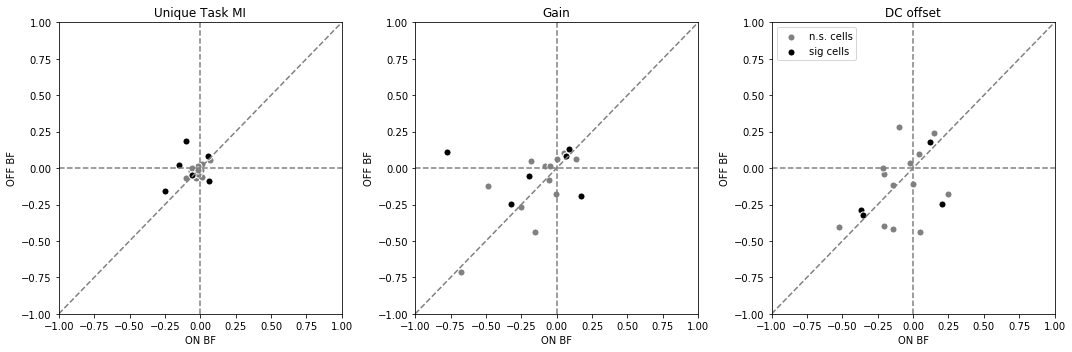

In [13]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

taskON = data[data.index.isin(matched) & (data.ON_BF)].groupby(by='cellid').mean()
taskOFF = data[data.index.isin(matched) & (data.OFF_BF)].groupby(by='cellid').mean()

axlim = 1
ax[0].set_title('Unique Task MI')
ax[0].scatter(taskON['MI_task'], taskOFF['MI_task'], color='grey', edgecolor='white', s=50)
ax[0].scatter(taskON[taskON.sig_task]['MI_task'], 
                taskOFF[taskOFF.sig_task]['MI_task'], color='k', edgecolor='white', s=50)
ax[0].plot([-1, 1], [-1, 1], 'grey', linestyle='--')
ax[0].axhline(0, linestyle='--', color='grey')
ax[0].axvline(0, linestyle='--', color='grey')
ax[0].set_xlim((-axlim, axlim))
ax[0].set_ylim((-axlim, axlim))
ax[0].set_xlabel('ON BF')
ax[0].set_ylabel('OFF BF')

ax[1].set_title('Gain')
ax[1].scatter(taskON['gain_task'], taskOFF['gain_task'], color='grey', edgecolor='white', s=50)
ax[1].scatter(taskON[taskON.sig_task]['gain_task'], 
                taskOFF[taskOFF.sig_task]['gain_task'], color='k', edgecolor='white', s=50)
ax[1].plot([-axlim, axlim], [-axlim, axlim], 'grey', linestyle='--')
ax[1].axhline(0, linestyle='--', color='grey')
ax[1].axvline(0, linestyle='--', color='grey')
ax[1].set_xlim((-axlim, axlim))
ax[1].set_ylim((-axlim, axlim))
ax[1].set_xlabel('ON BF')
ax[1].set_ylabel('OFF BF')

ax[2].set_title('DC offset')
ax[2].scatter(taskON['dc_task'], taskOFF['dc_task'], color='grey', edgecolor='white', s=50, label='n.s. cells')
ax[2].scatter(taskON[taskON.sig_task]['dc_task'], 
                taskOFF[taskOFF.sig_task]['dc_task'], color='k', edgecolor='white', s=50, label='sig cells')
ax[2].plot([-axlim, axlim], [-axlim, axlim], 'grey', linestyle='--')
ax[2].axhline(0, linestyle='--', color='grey')
ax[2].axvline(0, linestyle='--', color='grey')
ax[2].legend()
ax[2].set_xlim((-axlim, axlim))
ax[2].set_ylim((-axlim, axlim))
ax[2].set_xlabel('ON BF')
ax[2].set_ylabel('OFF BF')

f.tight_layout()